[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sudarshan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Dataset Shape: (744, 7)

Missing Values:
 SUBJECT_ID        0
ROW_ID            0
HADM_ID           0
CATEGORY          0
ADMISSION_TYPE    0
DIAGNOSIS         0
TEXT              0
dtype: int64

Sample Output:


,TEXT,sentiment_score,sentiment_label
0,Admission Date: [**2162-3-3**] D...,0.6289,Positive
1,Admission Date: [**2150-2-25**] ...,-0.9972,Negative
2,Admission Date: [**2101-10-25**] ...,-0.9997,Negative
3,Admission Date: [**2148-2-3**] D...,0.3628,Positive
4,Admission Date: [**2174-5-29**] ...,-0.9997,Negative
5,Admission Date: [**2188-11-1**] Discharge...,0.8816,Positive
6,Admission Date: [**2119-5-12**] ...,-0.9937,Negative
7,Admission Date: [**2189-9-7**] D...,-0.9989,Negative
8,Admission Date: [**2118-7-10**] ...,-0.9996,Negative
9,Admission Date: [**2101-11-1**] ...,-0.9963,Negative



Sentiment Distribution:
sentiment_label
Negative    669
Positive     71
Neutral       4
Name: count, dtype: int64


C:\Users\sudarshan\AppData\Local\Temp\ipykernel_18420\1734433309.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_label', data=df, palette='coolwarm')


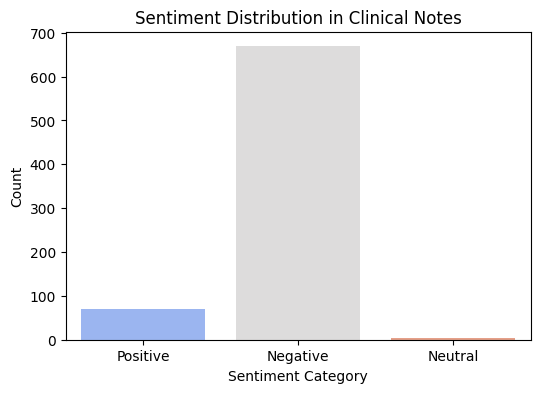

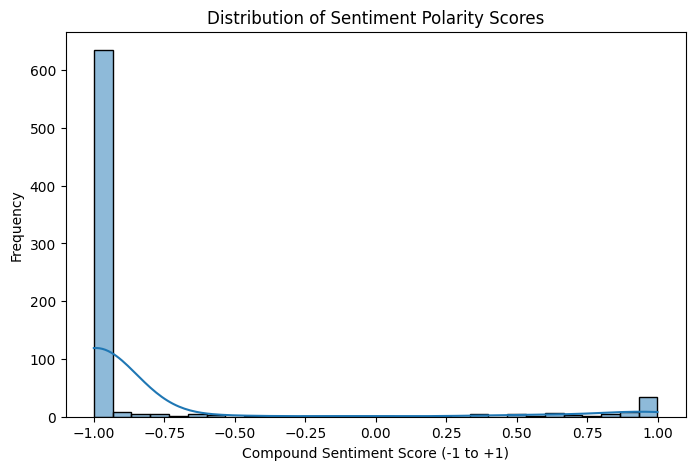


✅ Sentiment analysis completed and results saved as 'clinical_notes_sentiment_output.csv'


In [1]:
# ============================================================
# Experiment 6: Sentiment Analysis of Clinical Notes
# ============================================================

# 1.1 Aim
# Perform sentiment analysis on clinical notes and compute polarity scores.

# 1.2 Lab Outcome
# Apply knowledge of healthcare data structures to organize and prepare text data.

# 1.3 Learning Outcome
# Implement sentiment classification models (VADER) on clinical text to detect emotions.

# ============================================================
# Step 1: Import Libraries
# ============================================================

import pandas as pd
import numpy as np
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

# Download VADER lexicon if not already installed
nltk.download('vader_lexicon')

# ============================================================
# Step 2: Load Dataset
# ============================================================

# You should first download the dataset manually from:
# https://www.kaggle.com/datasets/akashadesai/clinical-notes?resource=download

# Example: Suppose the CSV file is named "clinical_notes.csv"
df = pd.read_csv("medical_data.csv")

# Display basic info
print("Dataset Shape:", df.shape)
df.head()

# ============================================================
# Step 3: Data Cleaning
# ============================================================

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Drop rows with empty notes (if any)
df.dropna(subset=['TEXT'], inplace=True)

# Keep only relevant columns (e.g., SUBJECT_ID, HADM_ID, TEXT)
if 'TEXT' not in df.columns:
    raise KeyError("Column 'TEXT' not found in dataset. Please verify column names.")

# Preview cleaned data
df.head()

# ============================================================
# Step 4: Initialize VADER Sentiment Analyzer
# ============================================================

sia = SentimentIntensityAnalyzer()

# ============================================================
# Step 5: Compute Polarity Scores
# ============================================================

def get_sentiment_scores(text):
    score = sia.polarity_scores(str(text))
    return score['compound']  # compound gives overall sentiment (-1 to +1)

# Apply sentiment analysis
df['sentiment_score'] = df['TEXT'].apply(get_sentiment_scores)

# ============================================================
# Step 6: Classify Sentiment Labels
# ============================================================

def label_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_label'] = df['sentiment_score'].apply(label_sentiment)

# ============================================================
# Step 7: Display Results
# ============================================================

print("\nSample Output:")
display(df[['TEXT', 'sentiment_score', 'sentiment_label']].head(10))

# Sentiment distribution
print("\nSentiment Distribution:")
print(df['sentiment_label'].value_counts())

# ============================================================
# Step 8: Visualization
# ============================================================

plt.figure(figsize=(6,4))
sns.countplot(x='sentiment_label', data=df, palette='coolwarm')
plt.title("Sentiment Distribution in Clinical Notes")
plt.xlabel("Sentiment Category")
plt.ylabel("Count")
plt.show()

# Histogram of sentiment scores
plt.figure(figsize=(8,5))
sns.histplot(df['sentiment_score'], bins=30, kde=True)
plt.title("Distribution of Sentiment Polarity Scores")
plt.xlabel("Compound Sentiment Score (-1 to +1)")
plt.ylabel("Frequency")
plt.show()

# ============================================================
# Step 9: Save Results
# ============================================================

df.to_csv("clinical_notes_sentiment_output.csv", index=False)
print("\n✅ Sentiment analysis completed and results saved as 'clinical_notes_sentiment_output.csv'")
